In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.io import gbq

In [2]:
project_id='izettle-dp-pipeline-prod'

# Dataset: google_analytics_session

In [3]:
users = '''
                            SELECT 
                                Count(DISTINCT full_visitor_id) AS nr_visitors, 
                                COUNT(DISTINCT client_id) AS nr_clients,
                                COUNT(DISTINCT organization_uuid) AS nr_customers
                            FROM legacy_views.google_analytics_session
                         '''

In [4]:
users_sql = gbq.read_gbq(query=users, dialect ='standard', project_id = project_id)
print(users_sql)

//anaconda3/lib/python3.7/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


   nr_visitors  nr_clients  nr_customers
0      4927226     4855266        399013


In [5]:
print(users_sql)

   nr_visitors  nr_clients  nr_customers
0      4927226     4855266        399013


In [6]:
time_frame = '''
                SELECT 
                    MIN(EXTRACT(year from hit_timestamp)) AS start_year,
                    MIN(EXTRACT(month from hit_timestamp)) AS start_month,
                    MAX(EXTRACT(year from hit_timestamp)) AS current_year,
                    MAX(EXTRACT(month from hit_timestamp)) AS current_month
                FROM legacy_views.google_analytics_session
            '''

In [7]:
time_frame_sql = gbq.read_gbq(query = time_frame, dialect = 'standard', project_id = project_id)

In [8]:
print(time_frame_sql)

   start_year  start_month  current_year  current_month
0        2019            3          2019              9


In [9]:
session_duration = '''
                    SELECT 
                          MAX(TIMESTAMP_DIFF(session_end_time, session_start_time, minute)) AS max_session_mins,
                          MIN(TIMESTAMP_DIFF(session_end_time, session_start_time, minute)) AS min_session_mins
                    FROM `izettle-dp-pipeline-prod.legacy_views.google_analytics_session`
                    '''

In [10]:
session_duration_sql = gbq.read_gbq(query = session_duration, dialect = 'standard', project_id = project_id)
print(session_duration_sql)

   max_session_mins  min_session_mins
0              1006                 0


In [14]:
traffic_source = '''
                    SELECT
                        DISTINCT(traffic_source_level_1) AS traffic_source_1,
                        COUNT(traffic_source_level_1) AS nr_traffic
                    FROM 
                        `izettle-dp-pipeline-prod.legacy_views.google_analytics_session`
                    GROUP BY
                        traffic_source_1
                    '''
traffic_source_sql = gbq.read_gbq(query = traffic_source, dialect = 'standard', project_id = project_id)

In [17]:
traffic_source_sql

,traffic_source_1,nr_traffic
0,direct,239808
1,online,69715973
2,partnerships,855512


In [4]:
traffic_source_2 ='''
                    SELECT
                        DISTINCT(traffic_source_level_2) AS traffic_source_2,
                        COUNT(traffic_source_level_2) AS nr_traffic
                    FROM 
                        `izettle-dp-pipeline-prod.legacy_views.google_analytics_session`
                    GROUP BY
                        traffic_source_2
                    '''
traffic_source_2_sql = gbq.read_gbq(query = traffic_source_2, dialect = 'standard', project_id = project_id)

//anaconda3/lib/python3.7/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [5]:
traffic_source_2_sql

,traffic_source_2,nr_traffic
0,o_paid,20195528
1,ds_keyaccount,164770
2,ds_inbound,75371
3,o_organic,49557481
4,ps_other,762018
5,ps_pay,8021
6,ps_product,5586
7,ps_bank,81616


In [8]:
traffic_source_3 ='''
                    SELECT
                        DISTINCT(traffic_source_level_3) AS traffic_source_3,
                        COUNT(traffic_source_level_3) AS nr_traffic
                    FROM 
                        `izettle-dp-pipeline-prod.legacy_views.google_analytics_session`
                    GROUP BY
                        traffic_source_3
                    ORDER BY 1
                    '''
traffic_source_3_sql = gbq.read_gbq(query = traffic_source_3, dialect = 'standard', project_id = project_id)

In [9]:
traffic_source_3_sql

,traffic_source_3,nr_traffic
0,ds_inbound_inbound,75371
1,ds_keyaccount_keyaccount,159117
2,ds_keyaccount_sdk,5653
3,o_organic_direct,22821355
4,o_organic_invite,16760
5,o_organic_null,4043956
6,o_organic_referral,3025765
7,o_organic_seo,19649645
8,o_paid_affiliate,1359813
9,o_paid_sem,17805577


Check quality: duplicated obs

In [3]:
check = '''
        SELECT 
            *
        FROM 
            `izettle-dp-pipeline-prod.legacy_views.google_analytics_session`
        ORDER BY 
            full_visitor_id,
            session_id
        LIMIT 2000
'''

check_sql = gbq.read_gbq(query = check, dialect = 'standard', project_id = project_id)

//anaconda3/lib/python3.7/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [5]:
check_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
full_visitor_id                        2000 non-null object
client_id                              1987 non-null object
organization_uuid                      1232 non-null object
country_id                             1993 non-null object
session_id                             2000 non-null object
session_start_time                     2000 non-null datetime64[ns, UTC]
session_end_time                       2000 non-null datetime64[ns, UTC]
session_first_vertical_page_visited    234 non-null object
session_last_vertical_page_visited     234 non-null object
session_nr_vertical_pages_visited      2000 non-null int64
traffic_source_level_1                 2000 non-null object
traffic_source_level_2                 2000 non-null object
traffic_source_level_3                 2000 non-null object
traffic_source_referral_path           2000 non-null object
traffic_source_campaign       

In [7]:
check_sql.duplicated().sum().sum()

688

In [9]:
check_sql.duplicated().head(20)

0     False
1     False
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14     True
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [10]:
check_sql.head(20)

,full_visitor_id,client_id,organization_uuid,country_id,session_id,session_start_time,session_end_time,session_first_vertical_page_visited,session_last_vertical_page_visited,session_nr_vertical_pages_visited,...,hit_timestamp,hit_vertical_page_name,hit_page_path,hit_page_host_name,hit_page_title,session_reached_minimal_page_visit,session_reached_minimal_created,session_reached_first_non_minimal,session_reached_ipos_submission,is_portal_login_session
0,1000001209939533521,232830925.1567104721,None,SE,b'\xc6\xae\xbc\xc0J\xfb\xd2\xe8\x8ff\x01\xe0\x...,2019-08-29 18:52:01+00:00,2019-08-29 18:52:01+00:00,None,None,0,...,2019-08-29 18:52:01+00:00,None,login.izettle.com/?app_version=5.28&os=ios&os_...,login.izettle.com,Sign in to your iZettle account,False,False,False,False,False
1,1000001643728112625,232831026.1563986929,None,SE,b'\xb7\x11\xb3\xdd\x038\xbfc$g;\xa2\x1fP3\xccJ...,2019-07-24 16:48:50+00:00,2019-07-24 16:48:50+00:00,None,None,0,...,2019-07-24 16:48:50+00:00,None,www.izettle.com/se,www.izettle.com,Ta emot kortbetalningar och fÃ¥ ditt fÃ¶retag ...,False,False,False,False,False
2,1000001643728112625,232831026.1563986929,None,SE,b'\xb7\x11\xb3\xdd\x038\xbfc$g;\xa2\x1fP3\xccJ...,2019-07-24 16:48:50+00:00,2019-07-24 16:48:50+00:00,None,None,0,...,2019-07-24 16:48:50+00:00,None,www.izettle.com/se,www.izettle.com,Ta emot kortbetalningar och fÃ¥ ditt fÃ¶retag ...,False,False,False,False,False
3,1000004916492220690,232831788.1563015442,None,NO,b'\x1eo\xb55\xb7\xce\x15\xc0`3|b\xbc\x89+\xd7\...,2019-07-13 10:57:21+00:00,2019-07-13 10:57:21+00:00,None,None,0,...,2019-07-13 10:57:21+00:00,None,www.izettle.com/no/help/mobile/articles/108480...,www.izettle.com,iZettle | Help - Rapporter,False,False,False,False,False
4,1000004916492220690,232831788.1563015442,None,NO,b'\x1eo\xb55\xb7\xce\x15\xc0`3|b\xbc\x89+\xd7\...,2019-07-13 10:57:21+00:00,2019-07-13 10:57:21+00:00,None,None,0,...,2019-07-13 10:57:21+00:00,None,www.izettle.com/no/help/mobile/articles/108480...,www.izettle.com,iZettle | Help - Rapporter,False,False,False,False,False
5,1000005582209221091,232831943.1560084963,None,MX,b'oL@\xbb\x92\xd7r\xb4R\x98\xb5E\x05\xc2\xd9\x...,2019-06-11 01:34:18+00:00,2019-06-11 01:34:18+00:00,None,None,0,...,2019-06-11 01:34:18+00:00,None,www.izettle.com/mx,www.izettle.com,Acepta pagos con tarjetas en tu negocio y vend...,False,False,False,False,False
6,1000005582209221091,232831943.1560084963,None,MX,b'|\xe4\xad\x04\xec\xfa\x9e\\\xce\x11*<\xb3\xb...,2019-06-15 01:11:16+00:00,2019-06-15 01:11:16+00:00,None,None,0,...,2019-06-15 01:11:16+00:00,None,www.izettle.com/mx/inicio,www.izettle.com,Acepta pagos con tarjetas y aumenta tus ventas...,False,False,False,False,False
7,1000005582209221091,232831943.1560084963,None,MX,b'}\xe5\xe5\xdaJ\t\x85\xe4\xec`~\xa6\xa6\xb1\x...,2019-06-11 21:04:20+00:00,2019-06-11 21:04:20+00:00,None,None,0,...,2019-06-11 21:04:20+00:00,None,www.izettle.com/mx,www.izettle.com,Acepta pagos con tarjetas en tu negocio y vend...,False,False,False,False,False
8,1000005582209221091,232831943.1560084963,None,MX,b'\x85\x92\x0c.\xeb\xcc\xf8\xe5\x9f\x07P\xd5\x...,2019-06-09 12:56:07+00:00,2019-06-09 12:56:07+00:00,None,None,0,...,2019-06-09 12:56:07+00:00,None,www.izettle.com/mx/inicio,www.izettle.com,Acepta pagos con tarjetas y aumenta tus ventas...,False,False,False,False,False
9,1000005582209221091,232831943.1560084963,None,MX,b'\x9fO\xaeU\xf4\x18@\xb8\x90\x17\xf8\xe4\xfc\...,2019-06-11 20:54:14+00:00,2019-06-11 21:01:47+00:00,None,None,0,...,2019-06-11 21:01:47+00:00,None,www.izettle.com/mx,www.izettle.com,Acepta pagos con tarjetas en tu negocio y vend...,False,False,False,False,False


In [1]:
%load_ext google.cloud.bigquery

In [6]:
%%bigquery session
SELECT 
    country_id,
    COUNT(DISTINCT session_id) AS nr_session
FROM legacy_views.google_analytics_session
GROUP BY country_id
ORDER BY 1


**Number of sessions by markets**

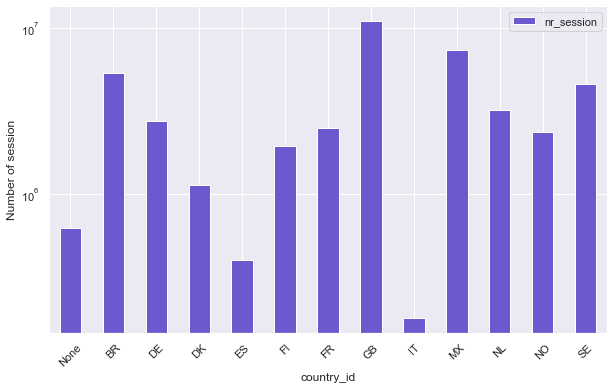

In [14]:
sns.set(rc = {'figure.figsize':(10,6)})
session.plot(kind = 'bar', x= 'country_id', y ='nr_session', color = 'slateblue', logy = True, rot = 45)
plt.ylabel('Number of session')
plt.show()

In [16]:
%%bigquery df
SELECT 
    client_id, 
    organization_uuid,
    country_id,
    session_id,
    session_start_time,
    session_end_time,
    traffic_source_level_1,
    traffic_source_level_2,
    traffic_source_level_3,
    device_is_mobile,
    device_browser,
    is_portal_login_session
FROM legacy_views.google_analytics_session
LIMIT 1000

In [17]:
df.head(10)

,client_id,organization_uuid,country_id,session_id,session_start_time,session_end_time,traffic_source_level_1,traffic_source_level_2,traffic_source_level_3,device_is_mobile,device_browser,is_portal_login_session
0,83648496.1512740726,a3ea81d0-7057-11e7-85a4-db8b9a4e9406,FI,b'g*\xb3\x98\xedc\xe0Ud2\xa6C4d\x03qz\xfb\x17[',2018-04-17 13:47:00+00:00,2018-04-17 13:50:55+00:00,online,o_organic,o_organic_seo,False,Firefox,True
1,535851669.1520886765,None,BR,b'#\xec\xb0\xe4\xd8\xe3\xe5\x1a\x1e\xe7\x9fC\x...,2018-04-06 20:55:12+00:00,2018-04-06 21:31:59+00:00,partnerships,ps_other,ps_other_partner,True,Chrome,False
2,785168705.1553947627,8a85f4e6-52e5-11e9-a6d3-ddb53b85c6c3,GB,b'\x90\xb5i~\xeem\xbfd\x9a\x8a\xa8\xb0\xe0G\xb...,2019-03-30 12:10:36+00:00,2019-03-30 12:33:25+00:00,online,o_paid,o_paid_sem,False,Chrome,False
3,279277126.1525713864,None,BR,b'\x14Yw\xb5\x00dV\x99N\xc8\x0c\xdd!\x1a\xa8\x...,2018-06-03 14:34:17+00:00,2018-06-03 14:34:17+00:00,online,o_organic,o_organic_direct,True,Safari (in-app),False
4,810134435.1539260066,60e65440-d354-11e6-bccc-724e34ba0b3f,SE,b'\x95Y\xde3\xcd\x1d\x08\xa2:\xe32\xc0\x8f\xda...,2019-07-18 13:21:28+00:00,2019-07-18 13:49:59+00:00,online,o_organic,o_organic_seo,False,Chrome,True
5,1212369900.1509519692,6164e770-4310-11e7-ac37-81f9be72daf1,GB,b'\x1avv\xe7\xc5D\xbb\xbd\xa4\xb7\xa6\xdc\x1f\...,2017-11-19 11:03:23+00:00,2017-11-19 12:04:26+00:00,online,o_organic,o_organic_direct,False,Chrome,True
6,1372416291.1490784069,None,NO,b'\xef%h\x8eDS\\\xb6{\x862\xfeL\x07/\x93^\xfe\...,2017-10-13 10:33:03+00:00,2017-10-13 10:43:19+00:00,online,o_organic,o_organic_direct,False,Chrome,False
7,931192355.1555417174,None,GB,b'N\xcd\xc9\x13\xe4\x1dm\x97\x04\x08\xf1x\x8f\...,2019-04-16 12:19:37+00:00,2019-04-16 12:22:35+00:00,online,o_paid,o_paid_sem,False,Chrome,False
8,1022749606.1489673559,7bf36220-9d84-11e5-8539-6988fc195603,DE,b'\xc8a\x026\t\x95\xe7\xfcj\xa8\xd2\x831/w\xd5...,2018-10-12 08:33:40+00:00,2018-10-12 08:36:07+00:00,online,o_paid,o_paid_sem,True,Chrome,True
9,1752869454.1553884021,f23f8f90-4c95-11e8-be53-5c6a282ac9cc,GB,b'\xde\x8a\xf4\xf0:\x1d\xc3g3\xb6\x8d\xb3\x15\...,2019-08-14 05:47:55+00:00,2019-08-14 06:05:53+00:00,online,o_organic,o_organic_direct,True,Chrome,True


In [23]:
%%bigquery count
SELECT 
    COUNT (DISTINCT organization_uuid) AS nr_converter,
    COUNT(DISTINCT client_id) AS total_users
FROM legacy_views.google_analytics_session
#WHERE organization_uuid IS NULL

In [24]:
count

,nr_converter,total_users
0,940845,16642454


Note: GA cannt track returning users and cannt track across devices & browsers

In [51]:
%%bigquery converters_client
SELECT 
    organization_uuid,
    COUNT(client_id) AS nr_clientid
FROM legacy_views.google_analytics_session
GROUP BY organization_uuid
ORDER BY 1

In [54]:
converters_client = converters_client[converters_client.nr_clientid != 92944269]

In [55]:
converters_client.nr_clientid.describe()

count    940845.000000
mean        193.679170
std         809.205545
min           0.000000
25%          25.000000
50%          59.000000
75%         146.000000
max      172059.000000
Name: nr_clientid, dtype: float64

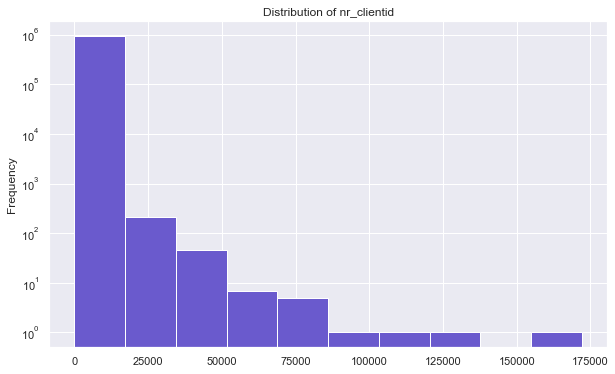

In [65]:
converters_client.nr_clientid.plot(kind = 'hist', logy = True, color = 'slateblue')
plt.title('Distribution of nr_clientid')
plt.show()

*Check one merchant: one with max number of client_id*

In [58]:
converters_client[converters_client.nr_clientid == 172059]

,organization_uuid,nr_clientid
534271,914f9080-93af-11e7-abf3-ca17449df5e7,172059


In [59]:
%%bigquery client
SELECT 
    client_id, 
    organization_uuid,
    country_id,
    session_id,
    session_start_time,
    session_end_time,
    traffic_source_level_1,
    traffic_source_level_2,
    traffic_source_level_3,
    device_is_mobile,
    device_browser,
    is_portal_login_session
FROM legacy_views.google_analytics_session
WHERE organization_uuid = '914f9080-93af-11e7-abf3-ca17449df5e7'

In [60]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182570 entries, 0 to 182569
Data columns (total 12 columns):
client_id                  172059 non-null object
organization_uuid          182570 non-null object
country_id                 182535 non-null object
session_id                 182570 non-null object
session_start_time         182570 non-null datetime64[ns, UTC]
session_end_time           182570 non-null datetime64[ns, UTC]
traffic_source_level_1     182570 non-null object
traffic_source_level_2     182570 non-null object
traffic_source_level_3     182570 non-null object
device_is_mobile           182570 non-null bool
device_browser             182570 non-null object
is_portal_login_session    182570 non-null bool
dtypes: bool(2), datetime64[ns, UTC](2), object(8)
memory usage: 14.3+ MB


In [63]:
print(client.session_start_time.max(), 'max start time')
print(client.session_start_time.min(), 'min start time')

2019-09-10 18:11:40+00:00 max start time
2017-09-07 09:08:41+00:00 min start time


In [64]:
client.session_id.nunique()

14992

**Number of converters by markets**

(approximate)

In [79]:
%%bigquery converters_market
WITH non AS(
            SELECT
                    country_id,
                    COUNT(DISTINCT client_id) AS nr_nonconverters
            FROM legacy_views.google_analytics_session 
            WHERE organization_uuid IS NULL
            GROUP BY country_id
),
con AS(
            SELECT
                    country_id,
                    COUNT(DISTINCT organization_uuid) AS nr_converters
            FROM legacy_views.google_analytics_session 
            GROUP BY country_id
)
SELECT
    con.country_id,
    nr_nonconverters,
    nr_converters
FROM con 
LEFT JOIN non
ON con.country_id = non.country_id

In [80]:
converters_market

,country_id,nr_nonconverters,nr_converters
0,NL,1050277.0,60763
1,SE,1202044.0,62446
2,MX,2618355.0,189207
3,FI,477209.0,39639
4,DK,348117.0,16424
5,BR,2493471.0,178222
6,ES,172714.0,8043
7,GB,3612454.0,265407
8,DE,896937.0,38405
9,FR,1210622.0,41899


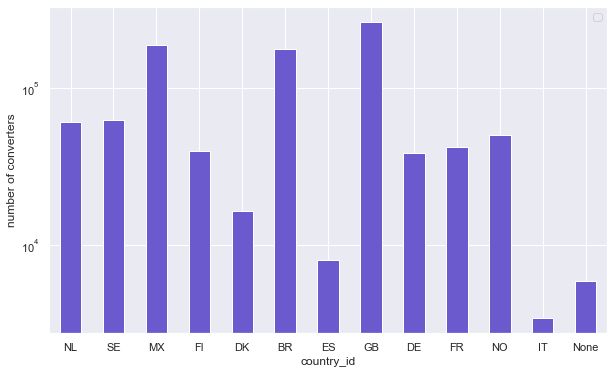

In [81]:
converters_market.plot(kind = 'bar', x = 'country_id', y ='nr_converters',color = 'slateblue', 
                       logy = True,
                      rot = 0)
plt.ylabel('number of converters')
plt.legend('')
plt.show()

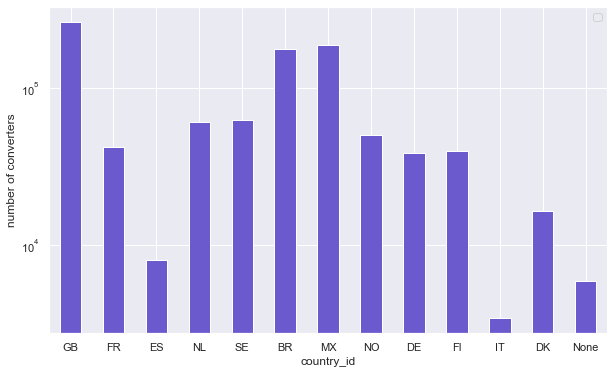

In [74]:
converters_market.plot(kind = 'bar', x = 'country_id', y ='nr_converters',color = 'slateblue', 
                       logy = True,
                      rot = 0)
plt.ylabel('number of converters')
plt.legend('')
plt.show()